In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import seaborn as sns

from src.winner import winner_model_rings
from src.damage import merge_df
from src.damage import read_damage_min_max
from src.damage import read_damage_mean

from src.binary_classification import df_train_test_split
from src.binary_classification import logistic_regression
from src.binary_classification import gaussiannb
from src.binary_classification import multinomialnb
from src.binary_classification import lda
from src.binary_classification import knn
from src.binary_classification import accuracy

In [3]:
import warnings
warnings.simplefilter('ignore')

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Prepare Dataset

In [4]:
mse_url = "output/ringsranking_mse_sixteen.csv"
rings_url = "output/ringsranking_rings_sixteen.csv"
df_ringsranking_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/ringsranking_mse_thirtytwo.csv"
rings_url = "output/ringsranking_rings_thirtytwo.csv"
df_ringsranking_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur otsu) 12.829318845239923 (subseq)
Polar Pith Canny(blur otsu) 12.88055458721076 (subseq)


In [5]:
mse_url = "output/pine_mse_sixteen.csv"
rings_url = "output/pine_rings_sixteen.csv"
df_pine_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/pine_mse_thirtytwo.csv"
rings_url = "output/pine_rings_thirtytwo.csv"
df_pine_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 19.888455438324574 (peaks)
Polar Pith Canny(blur triangle) 19.591747084408897 (peaks)


In [6]:
mse_url = "output/fur_mse_sixteen.csv"
rings_url = "output/fur_rings_sixteen.csv"
df_fur_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/fur_mse_thirtytwo.csv"
rings_url = "output/fur_rings_thirtytwo.csv"
df_fur_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 13.428984012468806 (peaks)
Polar Pith Canny(blur triangle) 13.688767879960144 (peaks)


In [7]:
mse_url = "output/tracy_mse_sixteen.csv"
rings_url = "output/tracy_rings_sixteen.csv"
df_tracy_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/tracy_mse_thirtytwo.csv"
rings_url = "output/tracy_rings_thirtytwo.csv"
df_tracy_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Canny(triangle) 39.683736416974455 (peaks)
Polar Pith Canny(triangle) 39.48914666858598 (peaks)


In [8]:
mse_url = "output/data_mse_sixteen.csv"
rings_url = "output/data_rings_sixteen.csv"
df_data_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/data_mse_thirtytwo.csv"
rings_url = "output/data_rings_thirtytwo.csv"
df_data_thirtytwo = winner_model_rings(mse_url, rings_url)

Canny(triangle) 18.789996216404624 (subseq)
Canny(triangle) 18.871624925897343 (subseq)


In [9]:
#damage
damage_sixteen_url = "damage/damage_sixteen.csv"
damage_thirtytwo_url = "damage/damage_thirtytwo.csv"

#merge
df_merge_sixteen = merge_df(df_ringsranking_sixteen, df_pine_sixteen, df_fur_sixteen, df_tracy_sixteen, df_data_sixteen)
df_merge_thirtytwo = merge_df(df_ringsranking_thirtytwo, df_pine_thirtytwo, df_fur_thirtytwo, df_tracy_thirtytwo, df_data_thirtytwo)

df_damage_sixteen_min_max = read_damage_min_max(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_min_max = read_damage_min_max(damage_thirtytwo_url, df_merge_thirtytwo)

df_damage_sixteen_mean = read_damage_mean(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_mean = read_damage_mean(damage_thirtytwo_url, df_merge_thirtytwo)

In [10]:
df_damage_sixteen_min_max

,image,Damage,algo,line_1,line_2,line_3,line_4,line_5,line_6,line_7,...,line_11,line_12,line_13,line_14,line_15,line_16,min,max,mean,orig
0,2-34e23370868237a073d086fb64851017e9b2c8c9_859...,1,subseq,55,51,51,57,56,32,30,...,83,62,58,56,52,57,30,83,53.4375,87.000000
1,1-5d205d5ea6bafd3c2e038cf1139cdd5a9825388f_275...,1,subseq,97,94,96,75,77,75,74,...,76,62,55,51,69,64,51,97,72.7500,59.666667
2,1-11c00bf7cc3e03dc86bde8a20c8ab390b0b2f2a4_d5d...,0,subseq,8,11,13,19,17,10,16,...,13,11,28,18,15,8,8,28,13.3125,18.000000
3,2-8c5de8aa63e57b1e5d3a11ce4c4e2ded042b2ef3_069...,0,subseq,54,44,46,40,31,34,42,...,29,42,34,24,28,45,24,60,37.6875,22.000000
4,1-3d78e56849a16c0b17831129f6059e367574a138_856...,0,subseq,21,30,27,19,27,23,22,...,27,17,19,18,34,25,17,34,23.2500,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,f5744022-17de-4885-b35c-5f94b9c2a586.jpg,0,subseq,56,50,51,47,46,45,44,...,64,65,51,49,54,42,42,65,50.1250,60.200000
144,f5382313-d332-471d-a5d1-629bb8e2e903.jpg,0,subseq,65,48,54,42,34,30,38,...,45,44,43,52,42,38,30,65,43.0625,64.000000
145,0da44e1b-8158-40d4-a311-2fc016111d13.jpg,0,subseq,65,65,47,37,42,47,31,...,40,42,35,34,41,34,31,65,42.4375,81.200000
146,0da46961-93dc-492c-b4d8-54d9b7e439fa.jpg,0,subseq,44,45,43,55,52,51,39,...,43,54,43,57,52,57,39,57,48.7500,97.200000


In [11]:
df_damage_thirtytwo_min_max

,image,Damage,algo,line_1,line_2,line_3,line_4,line_5,line_6,line_7,...,line_27,line_28,line_29,line_30,line_31,line_32,min,max,mean,orig
0,2-34e23370868237a073d086fb64851017e9b2c8c9_859...,1,subseq,55,55,51,56,50,56,53,...,60,46,52,47,61,57,30,83,52.90625,87.000000
1,1-5d205d5ea6bafd3c2e038cf1139cdd5a9825388f_275...,1,subseq,117,97,89,95,70,85,67,...,49,60,69,64,82,83,49,117,70.65625,59.666667
2,1-11c00bf7cc3e03dc86bde8a20c8ab390b0b2f2a4_d5d...,0,subseq,9,8,9,11,15,13,14,...,26,17,15,8,11,12,6,28,14.03125,18.000000
3,2-8c5de8aa63e57b1e5d3a11ce4c4e2ded042b2ef3_069...,0,subseq,56,44,57,48,50,43,43,...,32,28,37,45,52,34,26,57,39.31250,22.000000
4,1-3d78e56849a16c0b17831129f6059e367574a138_856...,0,subseq,21,33,30,31,27,22,19,...,13,27,34,29,25,27,13,34,22.78125,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,f5744022-17de-4885-b35c-5f94b9c2a586.jpg,0,subseq,61,59,48,56,67,52,50,...,45,49,46,54,45,49,40,67,51.15625,60.200000
144,f5382313-d332-471d-a5d1-629bb8e2e903.jpg,1,subseq,69,61,56,63,53,46,52,...,40,42,40,33,45,39,29,69,45.96875,64.000000
145,0da44e1b-8158-40d4-a311-2fc016111d13.jpg,0,subseq,65,65,52,60,48,48,47,...,34,35,32,34,41,34,32,65,43.34375,81.200000
146,0da46961-93dc-492c-b4d8-54d9b7e439fa.jpg,0,subseq,55,59,56,44,43,45,53,...,43,52,46,57,52,52,35,59,48.53125,97.200000


In [12]:
df_damage_sixteen_mean

,image,Damage,algo,line_1,line_2,line_3,line_4,line_5,line_6,line_7,...,line_11,line_12,line_13,line_14,line_15,line_16,min,max,mean,orig
0,2-34e23370868237a073d086fb64851017e9b2c8c9_859...,1,subseq,55,51,51,57,56,32,30,...,83,62,58,56,52,57,30,83,53.4375,87.000000
1,1-5d205d5ea6bafd3c2e038cf1139cdd5a9825388f_275...,0,subseq,97,94,96,75,77,75,74,...,76,62,55,51,69,64,51,97,72.7500,59.666667
2,1-11c00bf7cc3e03dc86bde8a20c8ab390b0b2f2a4_d5d...,0,subseq,8,11,13,19,17,10,16,...,13,11,28,18,15,8,8,28,13.3125,18.000000
3,2-8c5de8aa63e57b1e5d3a11ce4c4e2ded042b2ef3_069...,1,subseq,54,44,46,40,31,34,42,...,29,42,34,24,28,45,24,60,37.6875,22.000000
4,1-3d78e56849a16c0b17831129f6059e367574a138_856...,0,subseq,21,30,27,19,27,23,22,...,27,17,19,18,34,25,17,34,23.2500,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,f5744022-17de-4885-b35c-5f94b9c2a586.jpg,0,subseq,56,50,51,47,46,45,44,...,64,65,51,49,54,42,42,65,50.1250,60.200000
144,f5382313-d332-471d-a5d1-629bb8e2e903.jpg,1,subseq,65,48,54,42,34,30,38,...,45,44,43,52,42,38,30,65,43.0625,64.000000
145,0da44e1b-8158-40d4-a311-2fc016111d13.jpg,1,subseq,65,65,47,37,42,47,31,...,40,42,35,34,41,34,31,65,42.4375,81.200000
146,0da46961-93dc-492c-b4d8-54d9b7e439fa.jpg,1,subseq,44,45,43,55,52,51,39,...,43,54,43,57,52,57,39,57,48.7500,97.200000


In [13]:
df_damage_thirtytwo_mean

,image,Damage,algo,line_1,line_2,line_3,line_4,line_5,line_6,line_7,...,line_27,line_28,line_29,line_30,line_31,line_32,min,max,mean,orig
0,2-34e23370868237a073d086fb64851017e9b2c8c9_859...,1,subseq,55,55,51,56,50,56,53,...,60,46,52,47,61,57,30,83,52.90625,87.000000
1,1-5d205d5ea6bafd3c2e038cf1139cdd5a9825388f_275...,0,subseq,117,97,89,95,70,85,67,...,49,60,69,64,82,83,49,117,70.65625,59.666667
2,1-11c00bf7cc3e03dc86bde8a20c8ab390b0b2f2a4_d5d...,0,subseq,9,8,9,11,15,13,14,...,26,17,15,8,11,12,6,28,14.03125,18.000000
3,2-8c5de8aa63e57b1e5d3a11ce4c4e2ded042b2ef3_069...,1,subseq,56,44,57,48,50,43,43,...,32,28,37,45,52,34,26,57,39.31250,22.000000
4,1-3d78e56849a16c0b17831129f6059e367574a138_856...,0,subseq,21,33,30,31,27,22,19,...,13,27,34,29,25,27,13,34,22.78125,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,f5744022-17de-4885-b35c-5f94b9c2a586.jpg,0,subseq,61,59,48,56,67,52,50,...,45,49,46,54,45,49,40,67,51.15625,60.200000
144,f5382313-d332-471d-a5d1-629bb8e2e903.jpg,1,subseq,69,61,56,63,53,46,52,...,40,42,40,33,45,39,29,69,45.96875,64.000000
145,0da44e1b-8158-40d4-a311-2fc016111d13.jpg,1,subseq,65,65,52,60,48,48,47,...,34,35,32,34,41,34,32,65,43.34375,81.200000
146,0da46961-93dc-492c-b4d8-54d9b7e439fa.jpg,1,subseq,55,59,56,44,43,45,53,...,43,52,46,57,52,52,35,59,48.53125,97.200000


In [14]:
#STOP

# Experiment

## model with 16 lines

In [15]:
accuracy_sixteen_min_max = []

In [16]:
y_train, y_test, X_train, X_test = df_train_test_split(df_damage_sixteen_min_max)

Classes:  [0 1]


Intercept:  [-6.48771752]


Coefficeients:  [[ 7.60237130e+00 -4.15411139e-02  2.49241321e-02  3.50211499e-02
  -2.83834586e-02  1.97330403e-03 -1.55818666e-02  1.72687771e-02
  -4.19133244e-03 -1.83359722e-02 -1.85036714e-02  1.88200830e-02
   1.50730902e-02 -7.88070015e-03 -5.29604259e-02  3.06822367e-02
   1.53752505e-03 -1.29232656e-01  1.33239189e-01 -2.62989019e-03
  -8.47061018e-03]]


     Original  Dominant
116         0         0
128         1         1
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000         7

    accuracy                        

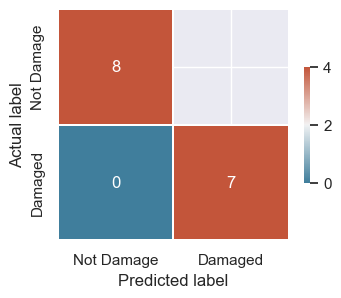

In [17]:
model_accuracy = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         1
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000         7

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         8.0  0.0
1         0.0  7.0




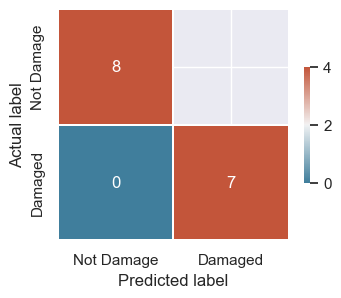

In [18]:
model_accuracy = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         0
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         0
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      0.800     1.000     0.889         8
           1      1.000     0.714     0.833         7

    accuracy                          0.867        15
   macro avg      0.900     0.857     0.861        15
weighted avg      0.893     0.867     0.863        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original    0    1
Dominant          
0         8.0  2.0
1         0.0  5.0




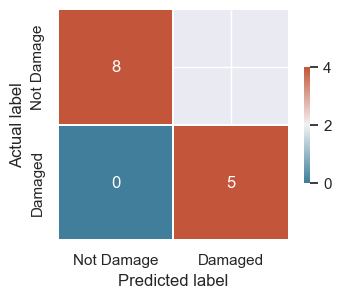

In [19]:
model_accuracy = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(model_accuracy)

[0 1]


[0.64661654 0.35338346]


[[  0.          51.15116279  49.10465116  47.12790698  45.
   44.06976744  45.03488372  42.62790698  44.34883721  45.51162791
   47.77906977  49.70930233  48.03488372  46.61627907  45.54651163
   45.25581395  46.51162791  33.91860465  59.94186047  46.46438953
   48.09767442]
 [  1.          79.53191489  84.53191489  87.5106383   78.57446809
   87.9787234   88.0212766   87.19148936  84.0212766   87.0212766
   94.87234043  91.21276596  90.40425532  82.04255319  76.57446809
   84.74468085  87.29787234  54.53191489 118.9787234   85.72074468
   83.58439716]]


[[ 0.00000000e+00 -1.25009281e-02  5.35741311e-02  1.74020525e-02
   4.57826046e-02 -6.63877460e-02 -9.61477861e-02  8.48537660e-02
  -1.03053470e-02 -5.59471473e-02 -3.52204643e-02  1.91041507e-02
   3.16788826e-02 -2.17662296e-02 -2.92747886e-02  3.89556241e-02
   1.62842394e-02 -2.80936875e-01  3.63495708e-01 -5.50350904e-03
   3.35265651e-04]]


     Original  Dominant
116         0         0
128 

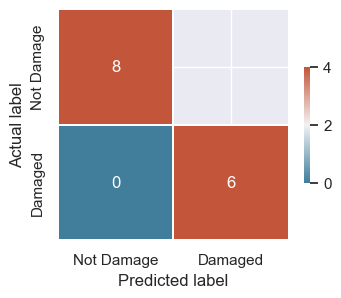

In [20]:
model_accuracy = lda(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(model_accuracy)

In [21]:
model_accuracy = 0
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         1
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000         7

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         8.0  0.0
1         0.0  7.0




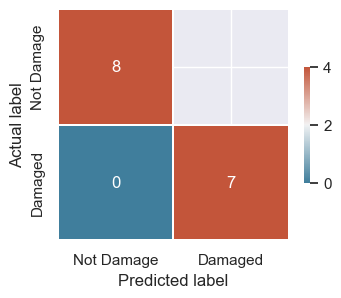

In [22]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         0
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.857     0.923         7

    accuracy                          0.933        15
   macro avg      0.944     0.929     0.932        15
weighted avg      0.941     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         8.0  1.0
1         0.0  6.0




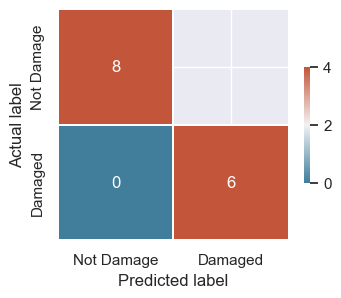

In [23]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         0
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.857     0.923         7

    accuracy                          0.933        15
   macro avg      0.944     0.929     0.932        15
weighted avg      0.941     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         8.0  1.0
1         0.0  6.0




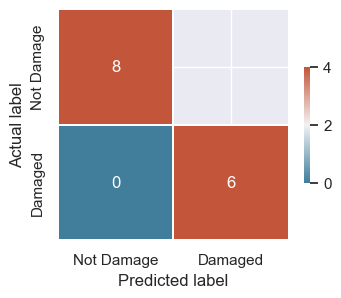

In [24]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         0
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.857     0.923         7

    accuracy                          0.933        15
   macro avg      0.944     0.929     0.932        15
weighted avg      0.941     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         8.0  1.0
1         0.0  6.0




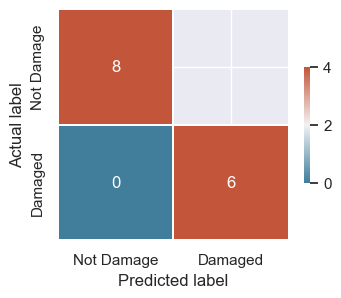

In [25]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_sixteen_min_max.append(model_accuracy)

     Original  Dominant
116         0         0
128         1         1
86          0         0
147         0         0
25          1         1
85          0         0
92          0         0
29          1         1
32          1         1
143         0         0
122         0         0
19          1         1
126         0         0
46          1         1
15          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000         7

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         8.0  0.0
1         0.0  7.0




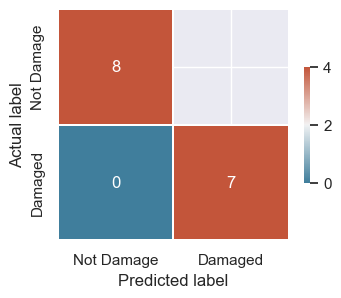

In [26]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_sixteen_min_max.append(model_accuracy)

## model with 32 lines

In [27]:
accuracy_thirtytwo_min_max = []

In [28]:
y_train, y_test, X_train, X_test = df_train_test_split(df_damage_thirtytwo_min_max)

Classes:  [0 1]


Intercept:  [-6.08157061]


Coefficeients:  [[ 7.80185349e+00 -1.52460493e-02  2.42252667e-03  1.72364213e-02
   2.12468565e-02 -2.30323325e-02 -9.58508568e-03  8.94742972e-03
   2.54660414e-02  1.15456236e-02  1.17752595e-04 -3.23656656e-03
   5.37053109e-03  1.05414684e-02  3.58162866e-02  2.90623361e-02
  -1.99435752e-02 -1.67150780e-02  1.13948518e-02  1.81045382e-03
   1.47767577e-02  3.47491101e-02  1.10080303e-02 -2.84242317e-02
   6.59235306e-03 -8.33338070e-02  8.58030217e-03  1.90500323e-02
  -2.99474970e-02  3.68808412e-02  2.54730012e-02  4.06054609e-03
   2.58578584e-02 -2.46568604e-01  4.49608780e-02  4.32947466e-03
  -3.36738602e-03]]


     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         1
7         

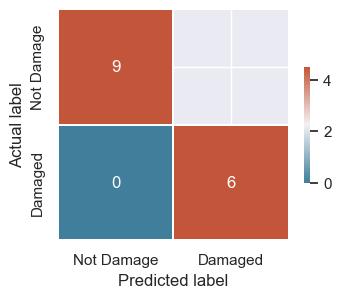

In [29]:
model_accuracy = logistic_regression(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         1
7           0         0
43          1         1
138         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         9.0  0.0
1         0.0  6.0




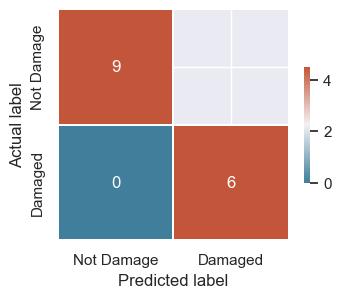

In [30]:
model_accuracy = gaussiannb(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         1
143         0         0
27          1         1
60          0         0
80          1         0
7           0         1
43          1         1
138         0         1


              precision    recall  f1-score   support

           0      0.857     0.667     0.750         9
           1      0.625     0.833     0.714         6

    accuracy                          0.733        15
   macro avg      0.741     0.750     0.732        15
weighted avg      0.764     0.733     0.736        15

Accuracy:0.7333333333333333


correct:11
incorrect:4
percentage:73.33333333333333


Original  0  1
Dominant      
0         6  1
1         3  5




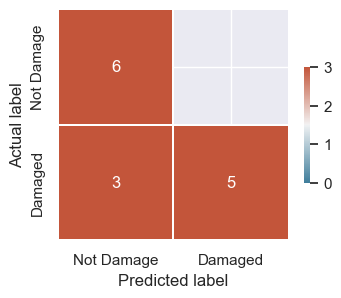

In [31]:
model_accuracy = multinomialnb(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_min_max.append(model_accuracy)

[0 1]


[0.56390977 0.43609023]


[[  0.          49.85333333  49.16        48.66666667  48.25333333
   46.82666667  45.53333333  43.25333333  42.76        42.96
   42.24        41.86666667  42.77333333  42.01333333  42.74666667
   41.94666667  42.24        42.98666667  44.09333333  44.78666667
   47.69333333  47.76        49.09333333  49.21333333  47.16
   47.08        45.48        44.56        43.77333333  42.74666667
   42.8         43.94666667  44.22666667  31.52        60.56
   45.01541667  45.544     ]
 [  1.          73.43103448  76.29310345  77.82758621  78.05172414
   76.17241379  75.86206897  78.72413793  75.67241379  78.20689655
   77.17241379  78.43103448  78.03448276  81.13793103  77.29310345
   80.36206897  80.12068966  82.03448276  81.22413793  84.5862069
   85.93103448  88.96551724  87.98275862  86.29310345  76.87931034
   74.77586207  75.60344828  76.12068966  74.20689655  77.55172414
   81.43103448  83.81034483  86.68965517  49.17241379 114.
   79.58997845  79.3321839

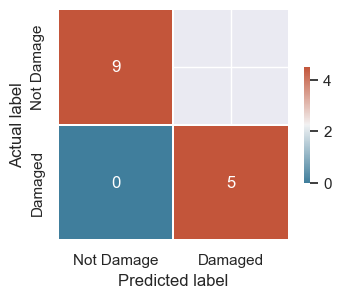

In [32]:
model_accuracy = lda(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_min_max.append(model_accuracy)

In [33]:
model_accuracy = 0
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         0
7           0         0
43          1         1
138         0         0


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




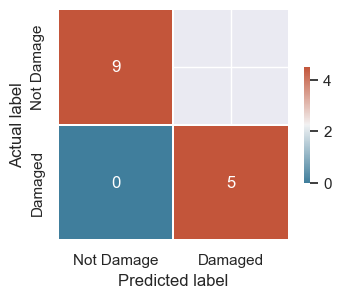

In [34]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         0
7           0         0
43          1         1
138         0         0


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




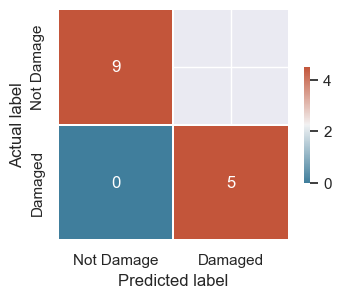

In [35]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         0
7           0         0
43          1         1
138         0         0


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




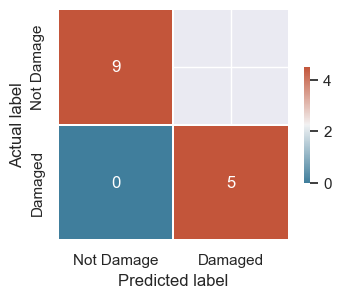

In [36]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         0
7           0         0
43          1         1
138         0         0


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




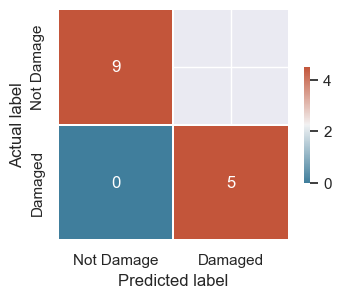

In [37]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_thirtytwo_min_max.append(model_accuracy)

     Original  Dominant
13          1         1
18          1         1
130         0         0
146         0         0
48          0         0
91          0         0
47          1         1
86          0         0
143         0         0
27          1         1
60          0         0
80          1         0
7           0         0
43          1         1
138         0         0


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




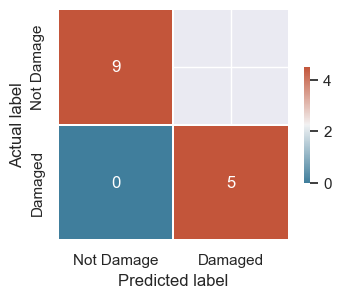

In [38]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_thirtytwo_min_max.append(model_accuracy)

## model with 16 lines

In [39]:
accuracy_sixteen_mean = []

In [40]:
y_train, y_test, X_train, X_test = df_train_test_split(df_damage_sixteen_min_max)

Classes:  [0 1]


Intercept:  [-6.33139945]


Coefficeients:  [[ 7.55896541e+00 -6.60046975e-02  2.07301812e-02  4.63088013e-02
  -1.21790279e-02  8.03789800e-03 -8.56865103e-03  3.14685815e-02
  -1.18142765e-02 -1.67792139e-02  3.49620529e-03  9.61477645e-03
  -5.46013756e-03  2.68221836e-02 -4.27900929e-02  2.36258887e-02
   9.71321997e-03 -1.55871278e-01  1.03651825e-01  1.01385242e-03
  -1.24828733e-02]]


     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         1
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         1
120         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         5

    accuracy                        

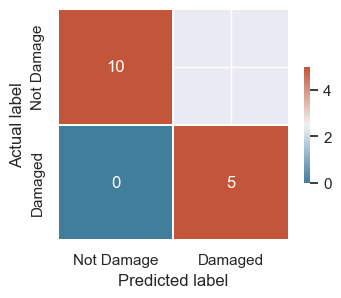

In [41]:
model_accuracy = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         1
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         1
120         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         5

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         10.0  0.0
1          0.0  5.0




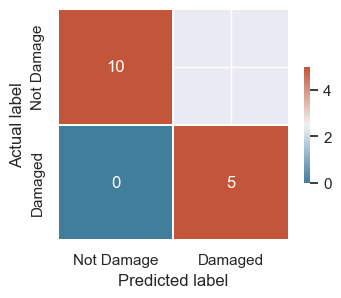

In [42]:
model_accuracy = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         0
147         0         0
49          0         0
35          1         0
71          0         0
63          0         0
100         0         0
112         0         0
31          1         0
8           0         1
72          1         0
120         0         0


              precision    recall  f1-score   support

           0      0.692     0.900     0.783        10
           1      0.500     0.200     0.286         5

    accuracy                          0.667        15
   macro avg      0.596     0.550     0.534        15
weighted avg      0.628     0.667     0.617        15

Accuracy:0.6666666666666666


correct:10
incorrect:5
percentage:66.66666666666667


Original  0  1
Dominant      
0         9  4
1         1  1




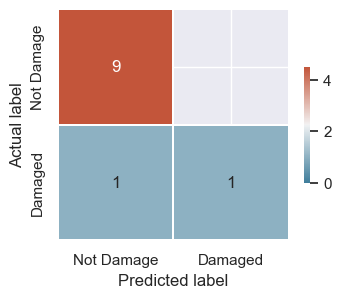

In [43]:
model_accuracy = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(model_accuracy)

[0 1]


[0.63157895 0.36842105]


[[  0.          51.58333333  49.0952381   47.67857143  44.45238095
   43.85714286  44.85714286  42.5         44.69047619  46.05952381
   48.76190476  50.5         48.08333333  46.97619048  45.67857143
   45.55952381  47.21428571  34.3452381   60.51190476  46.72172619
   48.58809524]
 [  1.          77.3877551   83.95918367  87.44897959  80.08163265
   88.24489796  90.65306122  88.79591837  84.75510204  87.71428571
   96.44897959  93.16326531  89.63265306  83.75510204  76.85714286
   84.95918367  89.36734694  54.93877551 119.42857143  86.45153061
   82.70340136]]


[[ 0.         -0.03250345  0.05336988  0.02539041  0.05876688 -0.06721471
  -0.05456193  0.06888274 -0.0233725  -0.04355636 -0.05336186  0.00547257
   0.01785071  0.03640863 -0.05972758  0.03339764  0.02593028 -0.24350404
   0.3332002  -0.00431162 -0.00056738]]


     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         1
147        

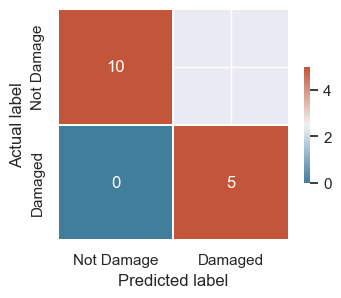

In [44]:
model_accuracy = lda(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(model_accuracy)

In [45]:
model_accuracy = 0
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         0
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         0
120         0         0


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




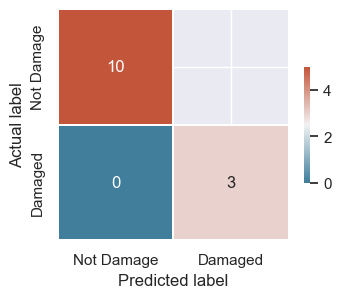

In [46]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         0
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         0
120         0         0


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




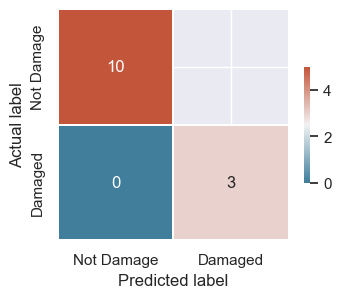

In [47]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         0
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         0
120         0         0


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




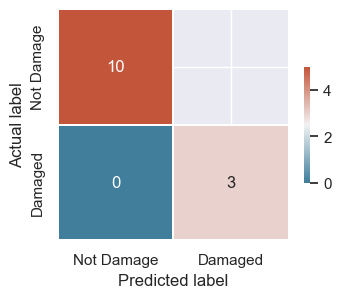

In [48]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         0
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         0
120         0         0


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




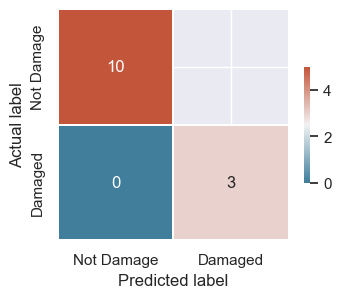

In [49]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_sixteen_mean.append(model_accuracy)

     Original  Dominant
62          0         0
137         0         0
12          1         1
70          1         0
147         0         0
49          0         0
35          1         1
71          0         0
63          0         0
100         0         0
112         0         0
31          1         1
8           0         0
72          1         0
120         0         0


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




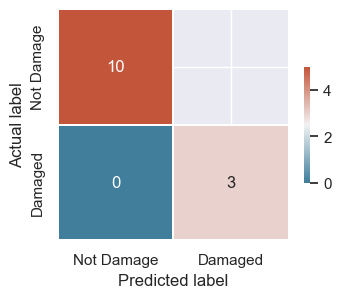

In [50]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_sixteen_mean.append(model_accuracy)

## model with 32 lines

In [51]:
accuracy_thirtytwo_mean = []

In [52]:
y_train, y_test, X_train, X_test = df_train_test_split(df_damage_thirtytwo_min_max)

Classes:  [0 1]


Intercept:  [-6.16630009]


Coefficeients:  [[ 7.69170144e+00 -1.12243416e-02 -6.23929600e-03  9.05598431e-03
   2.63172861e-02 -1.91652212e-02 -4.22207903e-03  6.25640002e-05
   2.89796548e-02  2.01767885e-02 -7.52993950e-03 -4.81169972e-03
  -4.45368900e-03  1.25422406e-02  2.67208644e-02  3.56732729e-02
  -2.29231523e-02 -7.42002147e-03  3.40879151e-03 -3.61362527e-03
   1.69479639e-02  3.12441699e-02  1.89359233e-02 -2.58946966e-02
   5.73616689e-03 -7.84767754e-02  3.47724256e-03  1.63230884e-02
  -1.51192891e-02  2.94714313e-02  1.95950057e-02 -7.01267427e-04
   2.50343756e-02 -2.32084069e-01  5.70429783e-02  3.68461628e-03
  -6.25721882e-03]]


     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         1
100         0         0
138         0         0
80          1         1
137         0         0
74        

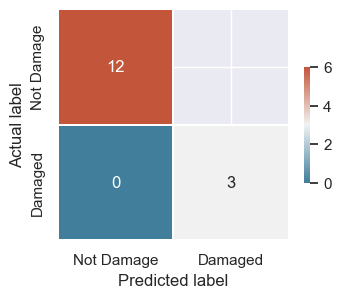

In [53]:
model_accuracy = logistic_regression(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         1
100         0         0
138         0         0
80          1         1
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000         3

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         12.0  0.0
1          0.0  3.0




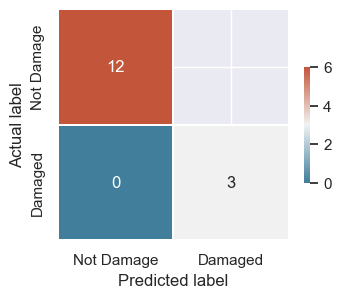

In [54]:
model_accuracy = gaussiannb(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         1
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         1
100         0         0
138         0         1
80          1         0
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      0.909     0.833     0.870        12
           1      0.500     0.667     0.571         3

    accuracy                          0.800        15
   macro avg      0.705     0.750     0.720        15
weighted avg      0.827     0.800     0.810        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original   0  1
Dominant       
0         10  1
1          2  2




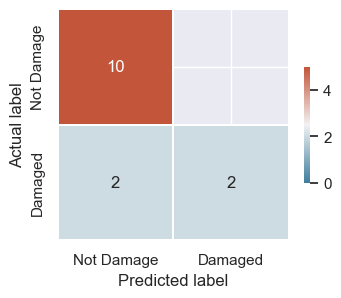

In [55]:
model_accuracy = multinomialnb(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_mean.append(model_accuracy)

[0 1]


[0.54135338 0.45864662]


[[  0.          49.56944444  49.26388889  48.63888889  48.125
   46.94444444  45.40277778  43.44444444  43.13888889  43.31944444
   42.875       42.15277778  43.22222222  42.30555556  42.55555556
   41.81944444  42.38888889  42.98611111  44.58333333  44.79166667
   47.66666667  47.90277778  48.51388889  48.51388889  46.40277778
   46.61111111  45.04166667  43.69444444  42.94444444  42.23611111
   42.90277778  44.41666667  44.27777778  31.41666667  60.26388889
   44.95789931  46.78611111]
 [  1.          75.54098361  78.45901639  80.52459016  80.49180328
   79.44262295  77.03278689  80.04918033  77.32786885  82.03278689
   80.19672131  80.80327869  80.39344262  84.63934426  80.78688525
   82.59016393  82.63934426  86.78688525  85.13114754  87.72131148
   90.36065574  92.54098361  89.54098361  87.68852459  80.83606557
   77.29508197  76.45901639  76.55737705  74.95081967  78.40983607
   81.91803279  84.50819672  86.45901639  50.63934426 116.29508197
   8

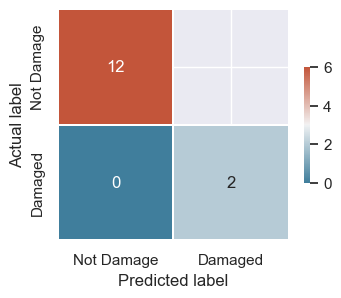

In [56]:
model_accuracy = lda(y_train,y_test ,X_train, X_test)
accuracy_thirtytwo_mean.append(model_accuracy)

In [57]:
model_accuracy = 0
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         1
100         0         0
138         0         0
80          1         0
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      0.923     1.000     0.960        12
           1      1.000     0.667     0.800         3

    accuracy                          0.933        15
   macro avg      0.962     0.833     0.880        15
weighted avg      0.938     0.933     0.928        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         12.0  1.0
1          0.0  2.0




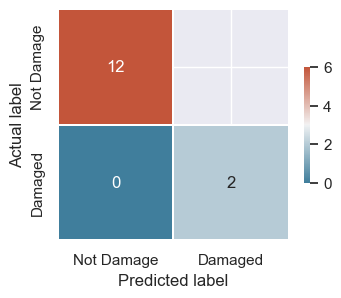

In [58]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         0
100         0         0
138         0         0
80          1         0
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      0.857     1.000     0.923        12
           1      1.000     0.333     0.500         3

    accuracy                          0.867        15
   macro avg      0.929     0.667     0.712        15
weighted avg      0.886     0.867     0.838        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         12.0  2.0
1          0.0  1.0




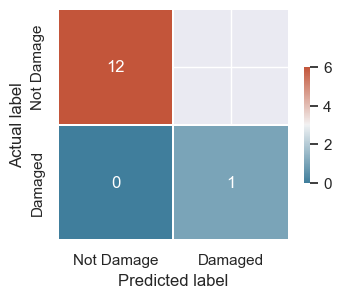

In [59]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         0
100         0         0
138         0         0
80          1         0
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      0.857     1.000     0.923        12
           1      1.000     0.333     0.500         3

    accuracy                          0.867        15
   macro avg      0.929     0.667     0.712        15
weighted avg      0.886     0.867     0.838        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         12.0  2.0
1          0.0  1.0




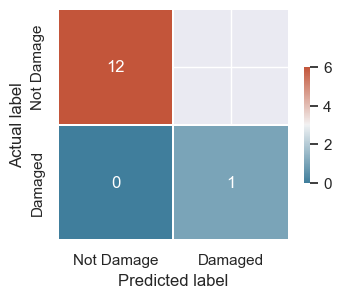

In [60]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         0
100         0         0
138         0         0
80          1         0
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      0.857     1.000     0.923        12
           1      1.000     0.333     0.500         3

    accuracy                          0.867        15
   macro avg      0.929     0.667     0.712        15
weighted avg      0.886     0.867     0.838        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         12.0  2.0
1          0.0  1.0




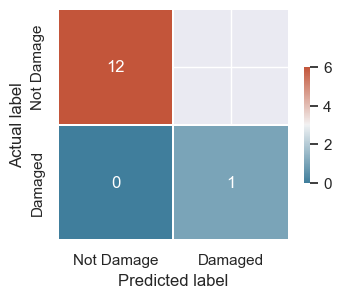

In [61]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_thirtytwo_mean.append(model_accuracy)

     Original  Dominant
114         0         0
111         0         0
103         0         0
126         0         0
117         0         0
28          1         1
77          0         0
21          1         0
100         0         0
138         0         0
80          1         0
137         0         0
74          0         0
5           0         0
57          0         0


              precision    recall  f1-score   support

           0      0.857     1.000     0.923        12
           1      1.000     0.333     0.500         3

    accuracy                          0.867        15
   macro avg      0.929     0.667     0.712        15
weighted avg      0.886     0.867     0.838        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         12.0  2.0
1          0.0  1.0




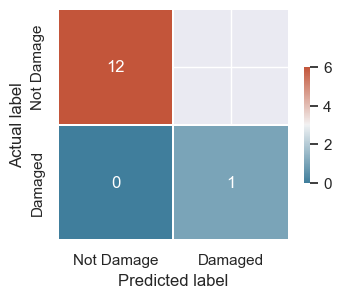

In [62]:
model_accuracy = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_thirtytwo_mean.append(model_accuracy)

# Accuracy

Logistic Regression: 1.0
Gaussian Naïve Bayes: 1.0
Multinomial Naïve Bayes: 0.8666666666666667
LDA: 0.9333333333333333
QDA: 0
kNN with K = 1: 1.0
kNN with K = 2: 0.9333333333333333
kNN with K = 3: 0.9333333333333333
kNN with K = 4: 0.9333333333333333
kNN with K = 5: 1.0


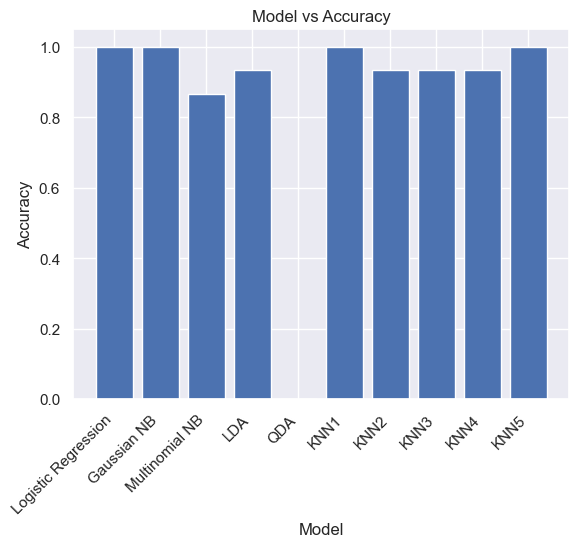

In [63]:
accuracy(accuracy_sixteen_min_max)

Logistic Regression: 1.0
Gaussian Naïve Bayes: 1.0
Multinomial Naïve Bayes: 0.7333333333333333
LDA: 0.9333333333333333
QDA: 0
kNN with K = 1: 0.9333333333333333
kNN with K = 2: 0.9333333333333333
kNN with K = 3: 0.9333333333333333
kNN with K = 4: 0.9333333333333333
kNN with K = 5: 0.9333333333333333


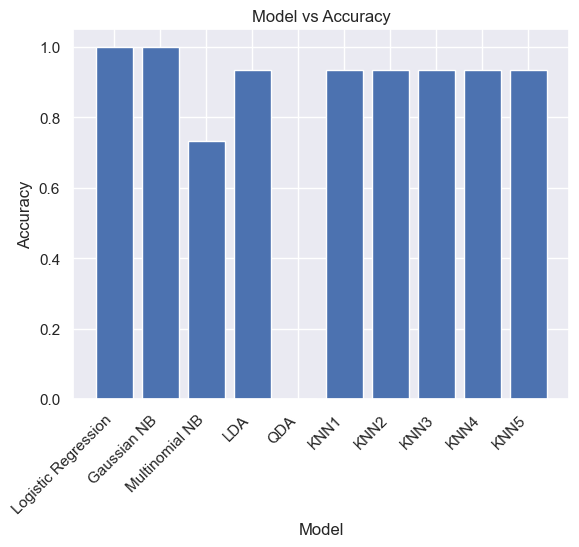

In [64]:
accuracy(accuracy_thirtytwo_min_max)

Logistic Regression: 1.0
Gaussian Naïve Bayes: 1.0
Multinomial Naïve Bayes: 0.6666666666666666
LDA: 1.0
QDA: 0
kNN with K = 1: 0.8666666666666667
kNN with K = 2: 0.8666666666666667
kNN with K = 3: 0.8666666666666667
kNN with K = 4: 0.8666666666666667
kNN with K = 5: 0.8666666666666667


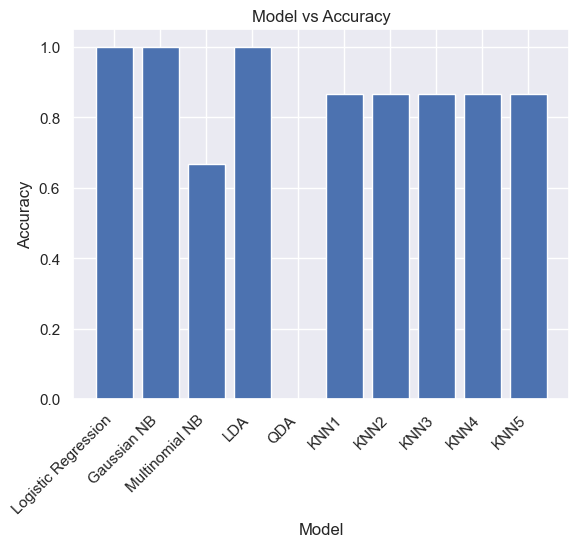

In [65]:
accuracy(accuracy_sixteen_mean)

Logistic Regression: 1.0
Gaussian Naïve Bayes: 1.0
Multinomial Naïve Bayes: 0.8
LDA: 0.9333333333333333
QDA: 0
kNN with K = 1: 0.9333333333333333
kNN with K = 2: 0.8666666666666667
kNN with K = 3: 0.8666666666666667
kNN with K = 4: 0.8666666666666667
kNN with K = 5: 0.8666666666666667


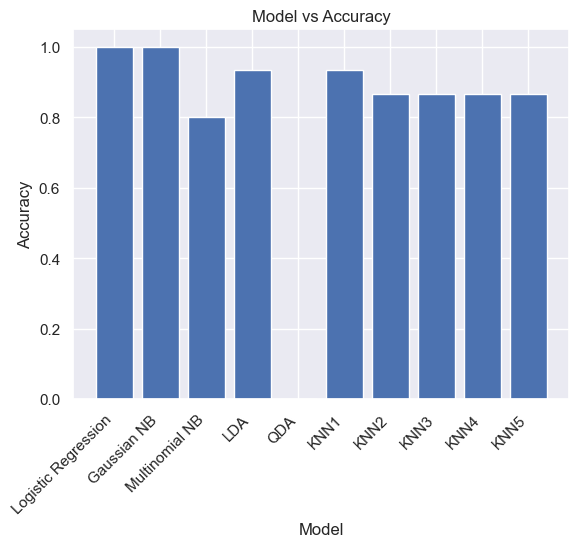

In [66]:
accuracy(accuracy_thirtytwo_mean)